In [1]:
import numpy as np
import random, math
from scipy.optimize import minimize
from scipy.spatial import distance
import matplotlib.pyplot as plt

In [2]:
def linearKernel(x, y):
    return np.dot(x, y)

In [3]:
x = np.array([1,2,3])
y = np.array([1,3,4])
print(linearKernel(x, y))

19


In [4]:
def polynomialKernel(x, y, p):
    return np.power((1 + np.dot(x, y)), p)

In [5]:
print(polynomialKernel(x, y, 2))

400


In [6]:
def rbfKernel(x, y, sigma):
    return np.exp(-(distance.euclidean(x, y))/(2*np.power(sigma, 2)))

In [7]:
print(rbfKernel(x, y, 100))

0.9999292918218224


In [22]:
def computeP (t, x):
    p = np.zeros((len(t), len(t)))
    for i in range(len(t)):
        for j in range(len(t)):
            p[i][j] = t[i] * t[j] * linearKernel(x[i], x[j])
    return p

In [9]:
x = np.array([1,2])
y = np.array([1,3])
t = np.array([1,-1])
p = computeP(t, x)
print(p)

[[ 1. -2.]
 [-2.  4.]]


In [10]:
def objective(alpha):
    alpha_matrix = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            alpha_matrix[i][j] = alpha[i] * alpha[j]
    alpha_times_p = np.matmul(alpha_matrix, p_ij)
    sum_alpha_times_p = 0 
    for i in range(N):
        sum_alpha_times_p += np.sum(alpha_times_p[i])
    return 0.5 * sum_alpha_times_p - np.sum(alpha)

In [11]:
def zerofun(alpha): 
    return np.dot(alpha, targets)

In [15]:
np.random.seed(100)

classA = np.concatenate(
    (np.random.randn(10, 2) * 0.2 + [1.5, 0.5],
    np.random.randn(10, 2) * 0.2 + [-1.5, 0.5]))
classB = np.random.randn(20, 2) * 0.2 + [0.0, -0.5]

inputs = np.concatenate((classA, classB))
targets = np.concatenate(
    (np.ones(classA.shape[0]),
    - np.ones(classB.shape[0])))

N = inputs.shape[0]

permute = list(range(N))
random.shuffle(permute)
inputs = inputs[permute, :]
targets = targets[permute]

p_ij = computeP(targets, inputs)

In [23]:
C = None 
B = [(0, C) for b in range(N)]
ret = minimize(objective, np.zeros(N), bounds = B, constraints = {'type': 'eq', 'fun':zerofun})
print(ret['x'])
print(ret['success'])

[0.00000000e+00 0.00000000e+00 1.46233396e-01 0.00000000e+00
 3.17270166e-15 0.00000000e+00 0.00000000e+00 1.46233396e-01
 4.75017799e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 6.94965638e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 7.17897126e-15 0.00000000e+00 0.00000000e+00
 1.44644330e-15 0.00000000e+00 0.00000000e+00 1.05811669e-14
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 1.46137812e-15 0.00000000e+00 0.00000000e+00
 0.00000000e+00 2.26807779e-15 0.00000000e+00 1.55517105e-14]
True


In [32]:
#extract non-zero alpha values
alpha = ret['x']
sv = []
for i in range(N):
    if alpha[i] > 10**-5:
        sv.append({'alpha': alpha[i], 'index':i, 'target': targets[i], 'input': inputs[i]})
        
print(sv)
print(len(sv))

[{'alpha': 0.14623339641752306, 'index': 2, 'target': -1.0, 'input': array([-0.3227157 , -0.20585723])}, {'alpha': 0.14623339641751756, 'index': 7, 'target': 1.0, 'input': array([-1.26207555,  0.16187663])}]
2


In [30]:
#calculate the b value equation 7 
def computeB(s):
    b = 0 
    for i in range(2):
        b += alpha[i] * targets[i] * linearKernel(s['input'], inputs[i])
    return b - s['target']

In [35]:
def computeB2(s):
    b = 0
    for i in range(len(sv)):
        if s['index'] != sv[i]['index']:
            b += sv[i]["alpha"] * sv[i]["target"] * linearKernel(s["input"], sv[i]['input'])
    return b - s['target']

In [31]:
#without C 
b_sv0 = computeB(sv[0])
b_sv1 = computeB(sv[1])
print('b_sv0', b_sv0, 'b_sv1', b_sv1)

b_sv0 1.033260127652772 b_sv1 -0.817929095825893


In [36]:
b2_sv0 = computeB2(sv[0])
b2_sv1 = computeB2(sv[1])
print('b2_sv0', b2_sv0, 'b2_sv1', b2_sv1)

b2_sv0 1.0546866281978915 b2_sv1 -1.0546866281978935


In [56]:
#indicator function 
def indicator (s):
    ind = 0
    for i in range(len(sv)):
        ind += sv[i]["alpha"] * sv[i]["target"] * linearKernel(s, sv[i]['input'])
    return ind - b2_sv0

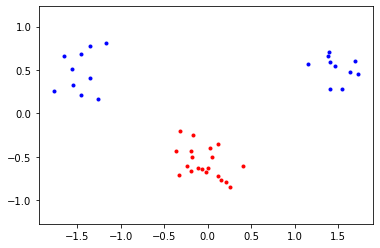

In [44]:
plt.plot([p[0] for p in classA], [p[1] for p in classA], "b.")
plt.plot([p[0] for p in classB], [p[1] for p in classB], "r.")
plt.axis('equal')
plt.savefig('svmplot.pdf')
plt.show()

50
50
[[-0.58295761 -0.61099144 -0.63902528 ... -1.90054775 -1.92858159
  -1.95661542]
 [-0.57417802 -0.60221186 -0.63024569 ... -1.89176817 -1.919802
  -1.94783583]
 [-0.56539844 -0.59343227 -0.6214661  ... -1.88298858 -1.91102241
  -1.93905624]
 ...
 [-0.17031701 -0.19835085 -0.22638468 ... -1.48790715 -1.51594099
  -1.54397482]
 [-0.16153743 -0.18957126 -0.21760509 ... -1.47912757 -1.5071614
  -1.53519523]
 [-0.15275784 -0.18079167 -0.2088255  ... -1.47034798 -1.49838181
  -1.52641565]]


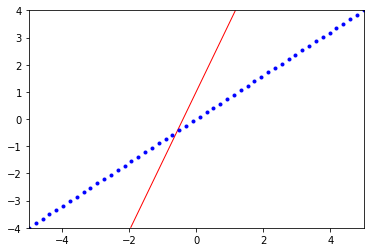

In [65]:
xgrid = np.linspace(-5 , 5)
print(len(xgrid))
ygrid = np.linspace(-4 , 4)
print(len(ygrid))

test_data = np.zeros((50,2))

for i in range(50):
    test_data[i] = np.array([xgrid[i], ygrid[i]])

grid = np.array([[indicator(np.array([x,y])) for x in xgrid] for y in ygrid])
print(grid)
plt.plot([p[0] for p in test_data], [p[1] for p in test_data], "b.")

plt.contour( xgrid, ygrid, grid,(-1.0 , 0.0 , 1.0 ), colors =('red', 'black','blue'), linewidths =(1, 3, 1))